# Notebook for mathematical modeling of sea ice

Jonatan Haraldsson and Alex Monteil


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm



# LaTeX font settings
plt.style.use('default')
plt.rc('text', usetex = True)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
font_size = 22
plt.rcParams['font.size'] = font_size

R_earth_km = 6.378e3

cmap = cm.get_cmap('coolwarm')

/var/folders/xl/schcbct544b8f32_b4484x5c0000gn/T/ipykernel_16275/3040339613.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


## Read and plot data for sea ice extent 

In [ ]:
def read_xlsx(filename):
    df = pd.read_excel(filename, sheet_name=0)
    return df

In [40]:
sea_ice = pd.read_excel('N_seaice_day.xlsx', sheet_name='N_seaice_day')
sea_ice = np.array(sea_ice)
sea_ice = pd.DataFrame(sea_ice,columns=['Year','Month','Day','Extent','Missing','source'])

display(sea_ice)

,Year,Month,Day,Extent,Missing,source
0,1979,1,2,14.997,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1979.01.02/nt_19...
1,1979,1,4,14.922,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1979.01.04/nt_19...
2,1979,1,6,14.929,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1979.01.06/nt_19...
3,1979,1,8,14.968,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1979.01.08/nt_19...
4,1979,1,10,15.19,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1979.01.10/nt_19...
...,...,...,...,...,...,...
15172,2024,12,27,12.131,0.0,['/ecs/DP4/PM/NSIDC-0081.002/2024.12.26/NSIDC0...
15173,2024,12,28,12.129,0.0,['/ecs/DP4/PM/NSIDC-0081.002/2024.12.27/NSIDC0...
15174,2024,12,29,12.246,0.0,['/ecs/DP4/PM/NSIDC-0081.002/2024.12.28/NSIDC0...
15175,2024,12,30,12.351,0.0,['/ecs/DP4/PM/NSIDC-0081.002/2024.12.29/NSIDC0...


10.469769863013697 [2023.]


Text(0, 0.5, 'Extent [$10^6$ km$^2$]')

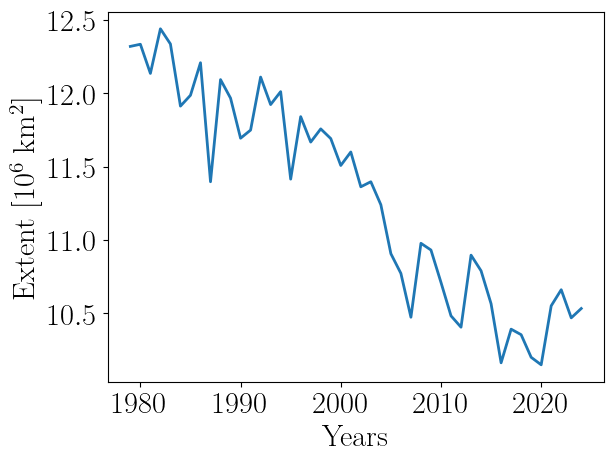

In [52]:
years = np.arange(1979,2025,dtype=float)
year_avg = np.zeros_like(years)
colors = 'tab:blue'
for i,year in zip(range(len(years)),years):
    year_avg[i] = np.mean(sea_ice['Extent'][(sea_ice['Year'] == year)])

plt.plot(years,year_avg,label='Annual Average',color = colors,lw=2)
print(np.mean(year_avg[44:-1]),years[44:-1])


plt.xlabel('Years')
plt.ylabel('Extent [$10^6$ km$^2$]')


### Plotting the data in histograms

Mean 1979-2000: 15.64 
Mean 2000-2023: 14.81 

Mean 1979-2000: 6.88 
Mean 2000-2023: 5.03 

Mean ice in Mar 2023 14.439935483870965
Mean ice in Sep 2023 4.371166666666666


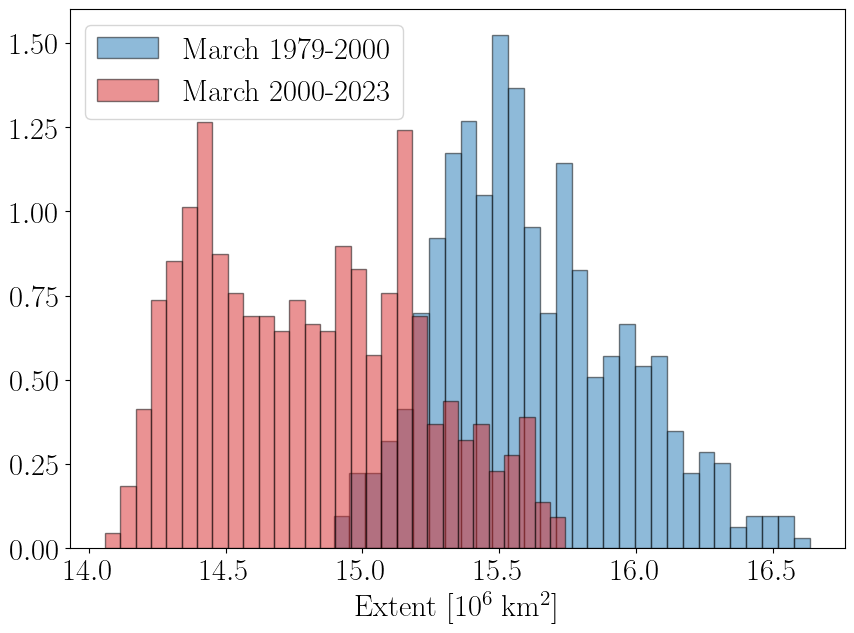

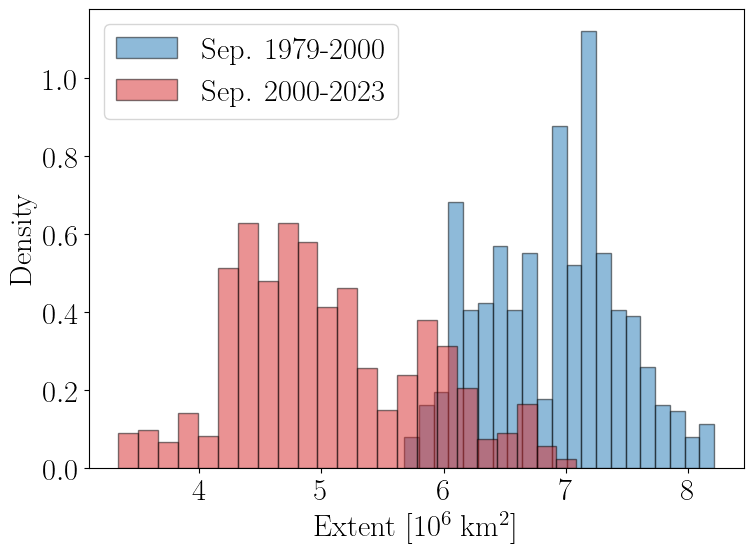

In [42]:
plt.figure(figsize=(10, 7))
plt.hist(sea_ice['Extent'][(sea_ice['Year'] >= 1979) & (sea_ice['Year'] <= 2000) & (sea_ice['Month'] == 3)],bins=30,density=True,color='tab:blue',alpha=0.5,edgecolor='black',label='March 1979-2000')
plt.hist(sea_ice['Extent'][(sea_ice['Year'] >= 2000) & (sea_ice['Month'] == 3)],bins=30, density=True,color='tab:red',alpha=0.5,edgecolor='black',label='March 2000-2023')
plt.xlabel('Extent [$10^6$ km$^2$]')
plt.legend()

mean_mar_old = np.mean(sea_ice['Extent'][(sea_ice['Year'] >= 1979) & (sea_ice['Year'] < 2000) & (sea_ice['Month'] == 3)])
mean_mar_new = np.mean(sea_ice['Extent'][(sea_ice['Year'] >= 2000) & (sea_ice['Month'] == 3)])
print(f'Mean 1979-2000: {mean_mar_old:.2f} \nMean 2000-2023: {mean_mar_new:.2f} \n')


plt.figure(figsize=(8, 6))
plt.hist(sea_ice['Extent'][(sea_ice['Year'] >= 1979) & (sea_ice['Year'] < 2000) & (sea_ice['Month'] == 9)],bins=21,density=True,color='tab:blue',alpha=0.5,edgecolor='black',label='Sep. 1979-2000')
plt.hist(sea_ice['Extent'][(sea_ice['Year'] >= 2000) & (sea_ice['Month'] == 9)],bins=23, density=True,color='tab:red',alpha=0.5,edgecolor='black',label='Sep. 2000-2023')
plt.xlabel('Extent [$10^6$ km$^2$]')
plt.ylabel('Density')
plt.legend()

mean_sep_old = np.mean(sea_ice['Extent'][(sea_ice['Year'] >= 1979) & (sea_ice['Year'] < 2000) & (sea_ice['Month'] == 9)])
mean_sep_new = np.mean(sea_ice['Extent'][(sea_ice['Year'] >= 2000) & (sea_ice['Month'] == 9)])
print(f'Mean 1979-2000: {mean_sep_old:.2f} \nMean 2000-2023: {mean_sep_new:.2f} \n')

plt.tight_layout()
plt.savefig('sea_ice_hist.pdf',transparent=True)

print(f"Mean ice in Mar 2023 {np.mean(sea_ice['Extent'][(sea_ice['Year'] == 2023) & (sea_ice['Month'] == 3)])}")
print(f"Mean ice in Sep 2023 {np.mean(sea_ice['Extent'][(sea_ice['Year'] == 2023) & (sea_ice['Month'] == 9)])}")

# Modeling with temperature

### Functions and constant values

First are our own created functions and then the functions neccesary for Budyko's equation. 

In [ ]:
L = 333.55e3 # Latent heat 
rho = 917   # Density of ice
k = 2.2  # Thermal conductivity
T0 = -1.8 # Freezing temperature of sea ice

def temp_variation(lat,day,dT_arc = 15,dT_eq = 2.5,day_shift = 0,return_dT = False):
    '''
    Temperature variation as a function of latitude and day of the year
    '''

    dT = (dT_arc-dT_eq) *((np.sin(np.deg2rad(lat)))) + dT_eq 
    T = dT * np.sin((2 * np.pi * (day - day_shift)/365)) 
    
    if return_dT:
        return T, dT
    else:
        return T

def albedo_h(h):
    '''
    Albedo of sea ice as a function of ice thickness
    '''

    a_max = 0.62
    a_sea = 0.32
    mu = 1.209
    k = 1 - a_sea / a_max

    return a_max * (1 - k * np.exp(-mu * h))


def ice_cap_area(iceline):
    """
    Area of ice cap. 
    """
    return 2 * np.pi * R_earth_km**2 * (1 - np.sin(np.deg2rad(iceline)))
    


def h_dot(Ta,h,Ta_avg = None, m_per_day = True, T0 = T0,rho = rho,k = k,L = L, t = None,Flux = True):
    """
    Function for the rate of change of thickness of sea ice
    """

    eps = 1e-1

    # Flux or no flux
    if t and Flux:
        F_T = flux_ocean(Ta_avg)
    else: 
        F_T = 0


    hdot = k * (T0 - Ta) / (rho * L * h) - F_T / (rho * L)

    if m_per_day:
        hdot = hdot * 24 * 3600

    # Putting boundarias on hdot
    if hdot < 0:
        h_dot = max(hdot,-eps)
        hdot = h_dot
    else:
        h_dot = min(hdot,eps)
        hdot = h_dot
    
    return hdot 

def GMT_increase(t):
    '''
    GMT increase, where t - days
    '''

    # GMT increase of 0.73C per decade
    T = (t / (10 * 365))
    return 0.73 * T

def flux_ocean(T_a):
    '''
    Oceanic heatflux as a  function of air temperature
    '''

    F_max = 20  # maximum ocean heat flux during summer
    F_min = 5   # minimum ocean heat flux during winter

    dF = (F_max - F_min) / 2

    Tmin = -25
    Tmax = 5
    T_0 = 1 - 2*Tmax/(Tmax - Tmin)


    F = dF * (np.tanh(np.pi * (T_0+ 2 * T_a/(Tmax - Tmin))) + 1) + (F_min)

    return F 

def h_t_non_albedo(lat,h_0,t_max_yr,dT=15,dt = 1,GMT = True, seasonal = True):
    '''
    Numerical solution to sea ice thickness

    lat = latitude
    h_0 = start thickness
    t_max_yr = number of years to simulate
    dT = temperature variation = 15
    dt = time step = 1
    GMT = true if GMT are considered
    seasonal = true if we are want seasonal varitions
    '''

    t_max = t_max_yr * 365
    h = h_0
    n = int(t_max/dt)

    # Initialize arrays that are returned at the end of the iterations
    thickness = np.zeros(n)
    time = np.zeros(n)
    yr_min = np.zeros(t_max_yr);yr_max = np.zeros(t_max_yr)

    # Running mean for the air temperature of 20 days
    N_mean = 20
    run_mean_temp = np.ones(N_mean) * T_lat(lat)
    T_air = np.mean(run_mean_temp)

    N = 0

    for i in range(n):
        t = i * dt

        if GMT:
            T_avg = T_lat(lat) + GMT_increase(t)
        else: 
            T_avg = T_lat(lat)
            
        if seasonal:
            Ta = T_avg + temp_variation(lat,int(t),dT_arc = dT)
        else:
            Ta = T_avg

        run_mean_temp[N] = Ta
        T_air = np.mean(run_mean_temp)

        # Calculating h_dot
        dh = h_dot(T_air,h,m_per_day = True,t = t,Ta_avg=T_avg)

        # Update h 
        h1 = h + dh * dt
        
        if h1 < 0 and dh < 0:
            h1 = 0
            h = h1
        else:
            h = h1
            thickness[i] = h1
        
        time[i] = t

        N += 1
        if i % (N_mean - 1) == 0 and i > 0:
            N = 0
    # Finding yearly min and max ice thickness
    for yr in range(t_max_yr):
        d = int(yr * 365)
        d1 = int((yr+1) * 365)
        yr_min[yr] = np.min(thickness[d:d1])
        yr_max[yr] = np.max(thickness[d:d1])

    return time/365, thickness, h,yr_min,yr_max


def h_t_albedo(lats,h_0,t_max_yr = 25,dt=1,dT=15,GMT = True, seasonal = True, t_eq = 0):
    '''
    Numerical solution to sea ice thickness
    lat = latitude
    h_0 = start thickness
    t_max_yr = number of years to simulate
    dT = temperature variation = 15
    dt = time step = 1
    GMT = true if GMT increase are considered
    seasonal = true if we want seasonal varitions
    t_eq = number of equilibraton years
    '''
    
    m = len(lats)
    t_max = t_max_yr * 365
    n = int(t_max/dt)
    
    # Initialize arrays
    thickness = np.zeros((n,m))
    T_surface = np.zeros_like(thickness)
    thickness[0,:] = h_0
    time = np.zeros(n)


    # Initializing area array
    area = np.zeros(n)
    for k in range(m):
        if thickness[0,k] > 0:
            ice_lat = lats[0]
            break
        else:
            ice_lat = 90

    area[0] = ice_cap_area(ice_lat)
    alpha = np.zeros_like(area)

    # Running mean for the air temperature of 10 days
    N_mean = 10
    run_mean_temp = np.zeros((N_mean,m))
    for k in range(m):
        run_mean_temp[:,k] = T_star(lats[k])


    N = 0
    for i in range(1,n):
        t = (i-1) * dt
        
        # Equilibration  
        if t_eq!= 0:
            if t>t_eq * 365:
                GMT = True
        

        if t % (10 * 365) == 0:
            print(f't = {t / 365} yr')
        
        for lat,j in zip(lats,range(0,m)):
            h = thickness[i-1,j]
            alpha[i] = albedo_h(h)
        
            if GMT:
                T_avg = T_star(lat,alpha_ice = alpha[i],ice_line=True,eta_deg = ice_lat) + GMT_increase(t - t_eq * 365)
            else: 
                T_avg = T_star(lat,alpha_ice = alpha[i],ice_line=True,eta_deg = ice_lat)
                
            if seasonal:
                Ta = T_avg + temp_variation(lat,int(t),dT_arc = dT)
            else:
                Ta = T_avg
            run_mean_temp[N,j] = Ta

            T_air = (np.mean(run_mean_temp,axis=0)[j])
            T_surface[i,j] = T_air
            

            dh = h_dot(T_air,h,m_per_day = True,t = t,Ta_avg=T_avg,Flux=True)
            h1 = h + dh * dt
            
            if h1 < 0 and dh < 0:
                thickness[i,j] = 0
            else:
                thickness[i,j] = h1


        for k in range(m):
            if thickness[i,k] > 0.1:
                ice_lat = lats[k]
            
                break
            else:
                ice_lat = 90
        area[i] = ice_cap_area(ice_lat)
        time[i] = t

        N += 1
        if t % (N_mean - 1) == 0 and t > 0:
            N = 0

    return time/365, thickness,area,T_surface,alpha 



'''------------------------------------------------------------'''
'''Functions for the Budyko Equation'''
'''------------------------------------------------------------'''

def s(y):
    return 1 - 0.241 * (3*y**2 - 1)

def alpha(y,eta,M,alpha_1 = 0.32,alpha_2 = 0.62):
    alpha_1 = albedo_h(0)

    alpha_ = .5*(-alpha_1+alpha_2) * (np.tanh((y - eta)*M) + 1) + alpha_1

    return alpha_

def S_b(eta):
    return eta * (1 - 0.241 * (eta**2 - 1))

def alpha_avg(eta,alpha_1 = 0.32,alpha_2 = 0.62):
    alpha_1 = albedo_h(0)
    return alpha_1 * S_b(eta) + alpha_2 * (1 - S_b(eta))


def T_star_avg(Q,A,B,alpha_avg):
    Q = 343; A = 202; B = 1.9; C = 3.04
    T = (Q * (1 - alpha_avg) - A) / B
    return T


def T_star(lat_deg,eta_deg = 90,M=5,ice_line = False, albedo = 0.32,alpha_ice=0.62):
    Q = 343; A = 202; B = 1.9; C = 3.04
    y = deg_to_y(lat_deg)
    eta = deg_to_y(eta_deg)
    if ice_line:
        T = (Q * s(y) * (1 - alpha(y,eta,M,alpha_2=alpha_ice)) - A + C * T_star_avg(Q,A,B,alpha_avg(eta,alpha_2=alpha_ice))) / (B + C)
    else:
        T_avg = (Q * (1 - albedo) - A) / B 
        T = (Q * s(y) * (1- albedo) - A + C * T_avg)/(B + C)
    return T


def T_lat(lat_deg):
    theta = np.deg2rad(lat_deg) 
    a = -12; b = 40
    T = a + b * (np.cos(theta)**3 * 3/2 * (2/3 + np.sin(theta)**2)) 
    return T 


def deg_to_y(ang):
    return np.sin(np.deg2rad(ang))

### Plotting the temperature as a function of latitude
This plot also includes the min and max for the seasonal variations. 

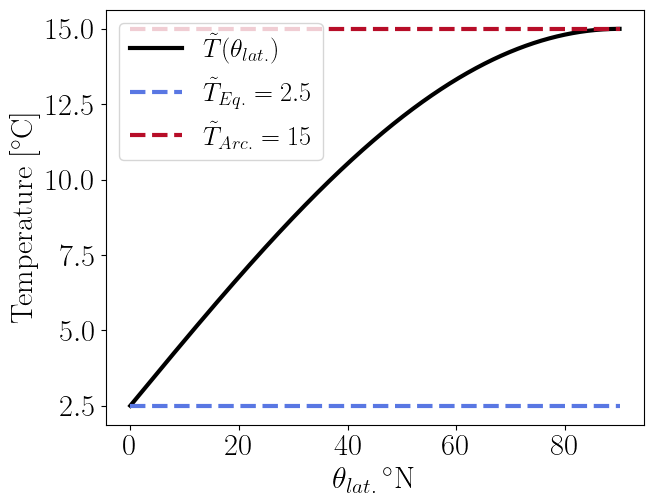

In [12]:
plt.figure(figsize=(7,5.5))
y = np.linspace(0,90,10000)
plt.plot(y,temp_variation(y,0,return_dT=True)[1],label = '$\\Tilde{T}(\\theta_{lat.})$',lw = 3,color = 'k')

color = cm.coolwarm(0.1)
plt.hlines(2.5,0,90,color = color,ls = 'dashed',lw = 3,label= '$\\Tilde{T}_{Eq.} = 2.5$')
color = cm.coolwarm(0.99)
plt.hlines(15,0,90,color = color,ls = 'dashed',lw = 3,label= '$\\Tilde{T}_{Arc.} = 15$')
plt.xlabel('$\\theta_{lat.}\\,^\\circ$N')
plt.ylabel('Temperature [$^\\circ$C]')
plt.legend(fontsize = 19)
plt.tight_layout()
#plt.savefig('figs/temp_variation.pdf')

### Plotting Budyko

Text(0, 0.5, 'Temperature [°C]')

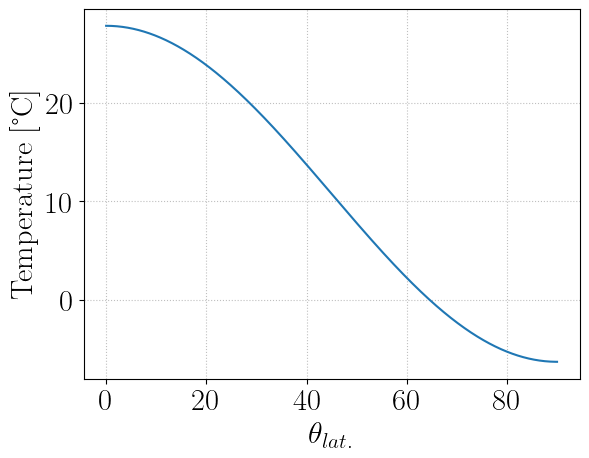

In [13]:
y = np.linspace(0,90,1000)
plt.plot((y),T_star(y))

plt.grid(alpha = 0.8,ls = 'dotted')
plt.xlabel('$\\theta_{lat.}$')
plt.ylabel('Temperature [°C]')

Here we plot Budyko with different values of $M$ and with an arbitrary ice line.

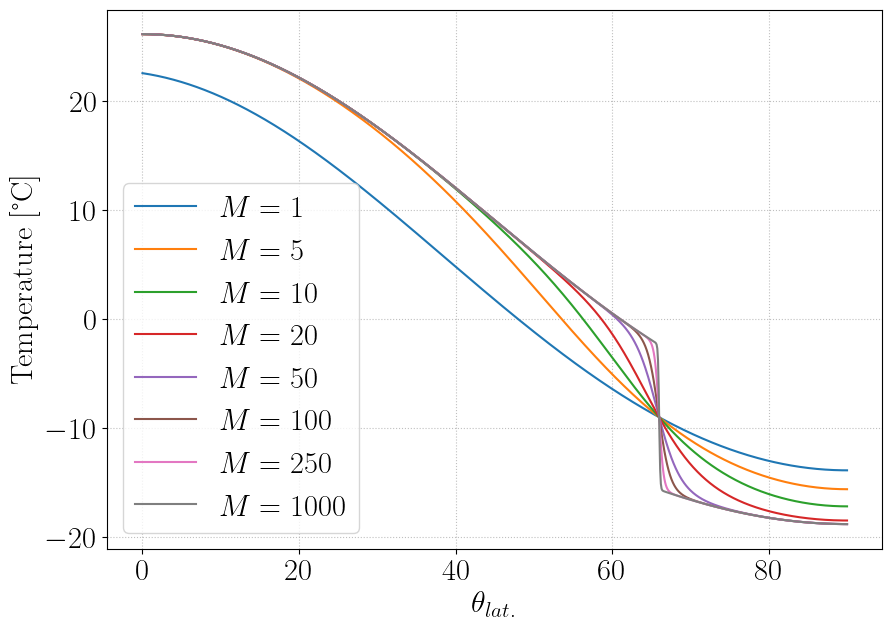

In [14]:
plt.figure(figsize=(10, 7))
y = np.linspace(0,90,1000)
M_ = [1,5,10,20,50,100,250,1000]
M = 10
for M in M_:
    plt.plot((y),T_star(y,ice_line=True,eta_deg = 66,M = M),label = f'$M={M}$')

plt.grid(alpha = 0.8,ls = 'dotted')
plt.xlabel('$\\theta_{lat.}$')


plt.ylabel('Temperature [°C]')
plt.legend()

### Plotting the seasonal variations in temperature

Avg temperature at 0 degrees: 28.0 ± 2.5 °C
Avg temperature at 10 degrees: 27.9 ± 4.7 °C
Avg temperature at 20 degrees: 27.0 ± 6.8 °C
Avg temperature at 30 degrees: 23.7 ± 8.7 °C
Avg temperature at 40 degrees: 17.1 ± 10.5 °C
Avg temperature at 50 degrees: 8.0 ± 12.1 °C
Avg temperature at 60 degrees: -1.4 ± 13.3 °C
Avg temperature at 70 degrees: -8.3 ± 14.2 °C
Avg temperature at 80 degrees: -11.5 ± 14.8 °C
Avg temperature at 90 degrees: -12.0 ± 15.0 °C


Text(0, 0.5, 'Temperature [°C]')

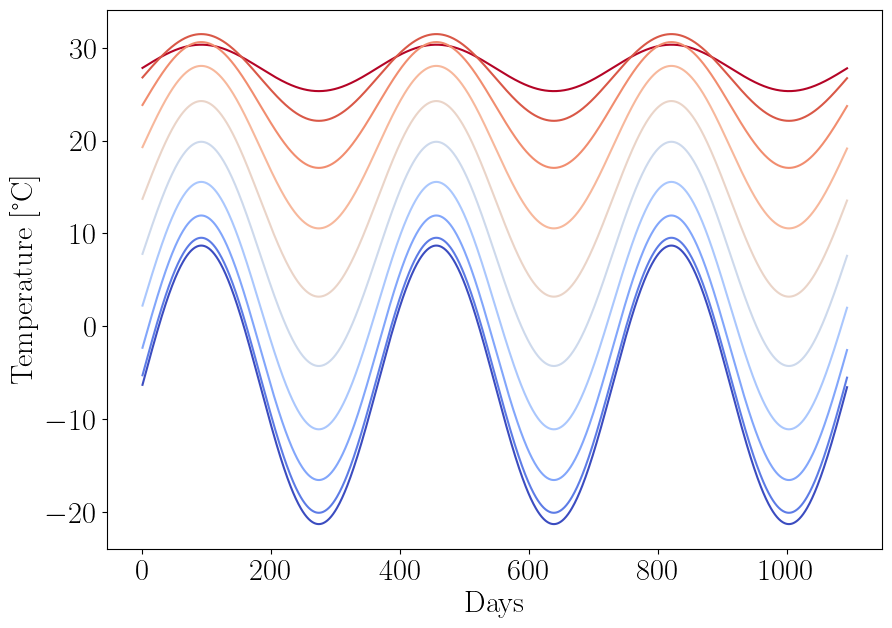

In [15]:
d = np.arange(0,3*365)

lats = np.arange(0,100,10)
plt.figure(figsize=(10, 7))
for lat in lats:
    color = cm.coolwarm(1 - lat/90)
    plt.plot(T_star(lat) + temp_variation(lat,d),label=f'lat: {lat}',color=color)
    print(f'Avg temperature at {lat} degrees: {T_lat(lat):.1f} ± {np.max(temp_variation(lat,d)):.1f} °C')
plt.xlabel('Days')
plt.ylabel('Temperature [°C]')


### Plotting the oceanic flux as a function of temperature

Text(0, 0.5, '$Q_o$ [W/m$^2$]')

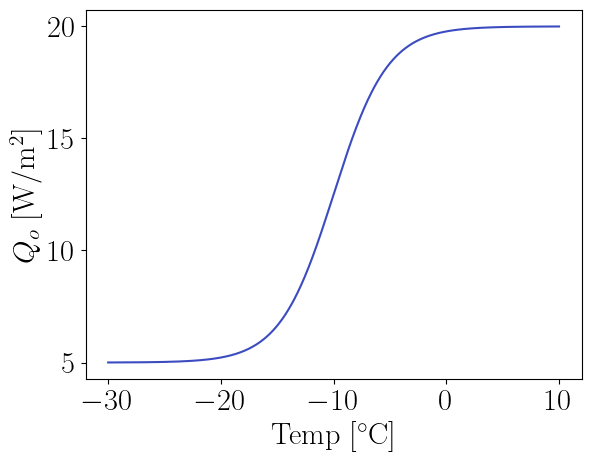

In [22]:
n = 0
Ta = np.linspace(-30,10,1000)
color = cmap( n / (len(lats)-1)) 
plt.plot(Ta,flux_ocean(Ta), color = color)
n+=1
plt.xlabel('Temp [$^\\circ$C]')
plt.ylabel('$Q_o$ [W/m$^2$]')

### Plotting the albedo as a function of $h$

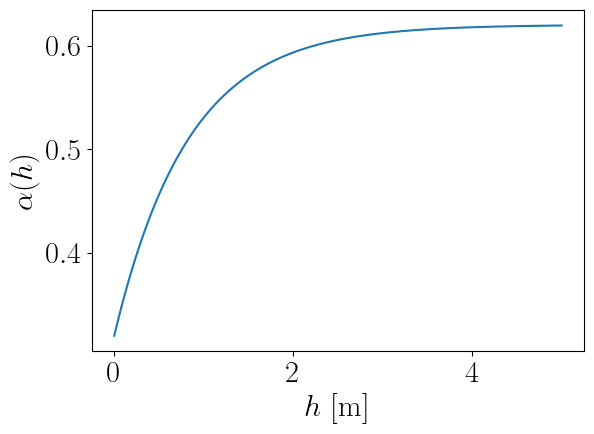

In [23]:
lats = np.linspace(0,90,250)
h = np.linspace(0,5,250)

alb = []
for hs in h:
    alb.append(albedo_h(hs))

plt.plot(h,alb)
plt.xlabel('$h$ [m]')
plt.ylabel('$\\alpha(h)$')
plt.tight_layout()
plt.savefig('figs/alp_h.png',transparent = True)

### Running simulation for $\theta_{lat.} = \{60,70,80,90\}$ with seasonal variation and without albedo

/var/folders/xl/schcbct544b8f32_b4484x5c0000gn/T/ipykernel_16275/644130956.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
/var/folders/xl/schcbct544b8f32_b4484x5c0000gn/T/ipykernel_16275/1586989992.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  hdot = k * (T0 - Ta) / (rho * L * h) - F_T / (rho * L)


Lat 	 Max ice 	 Min ice
60 	 0.83 m 	 	 0.00 m
70 	 1.39 m 	 	 0.24 m
80 	 2.27 m 	 	 1.77 m
90 	 2.52 m 	 	 2.07 m
Lat 	 Time to zero summer ice 	 Time to zero winter ice
60	 	 0 	  	 	 	 172
70	 	 4 	  	 	 	 199
80	 	 48 	  	 	 	 199
90	 	 55 	  	 	 	 199


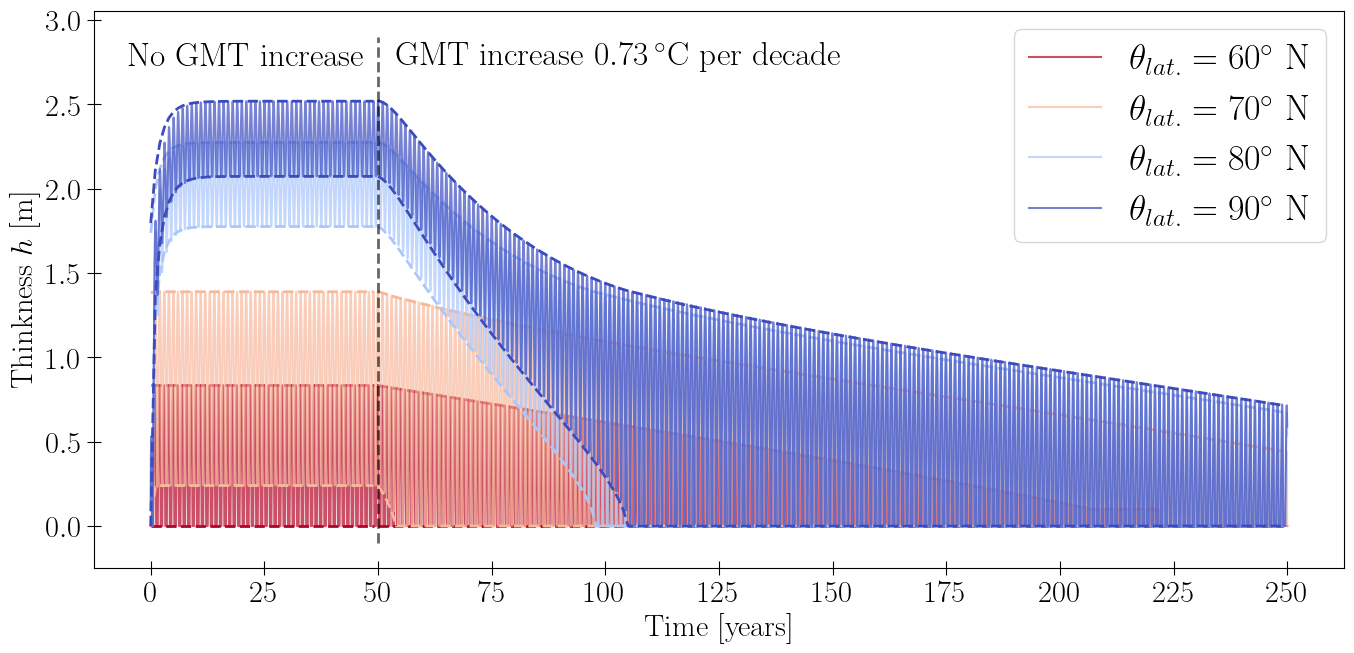

In [29]:
cmap = cm.get_cmap('coolwarm')
n = 0
t_eq = 50

t_max = 200

yr_eq = np.arange(0,t_eq)
yr = np.arange(0,t_max)
lat = [60,70,80,90]
plt.figure(figsize=(14, 7))


h_0_next = np.ones_like(lat) * 0.0
print('Lat \t Max ice \t Min ice')

for l in lat:
    color = cmap(1 - n / (len(lat)-1)) 
    h_0 = np.zeros_like(l)
    t, h,h_last,y_min,y_max = h_t_non_albedo(l,h_0, t_max_yr=t_eq,dt=1,GMT=False, dT = 15,seasonal=True)

    plt.plot(t,h,color = color,alpha = 0.7)
    plt.plot(yr_eq,y_min,color = color,lw = 2,ls = 'dashed')
    plt.plot(yr_eq,y_max,color = color,lw = 2,ls = 'dashed')

    print(f'{l} \t {np.max(y_max[45:]):.2f} m \t \t {np.min(y_min[45:]):.2f} m')
    h_0_next[n] = np.max((h[-365:]))
    n+=1
plt.ylabel('Thinkness $h$ [m]')
plt.xlabel('Time [years]')

n = 0
print('Lat \t Time to zero summer ice \t Time to zero winter ice')
for l in lat:
    color = cmap(1 - n / (len(lat)-1)) 
    t, h,h_last,y_min,y_max = h_t_non_albedo(l,h_0_next[n], t_max_yr=t_max,dt=1,GMT=True, dT = 15,seasonal=True)

    plt.plot(t + t_eq,h,color = color,label = f'$\\theta_{{lat.}} = {l}^\\circ$ N', alpha = 0.7)
    plt.plot(yr+ t_eq,y_min,color = color,lw = 2,ls = 'dashed')
    plt.plot(yr+ t_eq,y_max,color = color,lw = 2,ls = 'dashed')
    n+=1
    print(f'{l}\t \t {t[np.argmin(y_min) * 365]:.0f} \t  \t \t \t {t[np.argmin(y_max) * 365]:.0f}')
plt.vlines(t_eq,-0.1,2.9,color = 'k',ls = 'dashed',lw = 2,alpha = .6)

plt.text(t_eq+4,2.8,'GMT increase $0.73\\,^\\circ$C per decade',va = 'center_baseline',fontsize = 24)
plt.text(t_eq-55,2.8,'No GMT increase',va = 'center_baseline',fontsize = 24)




plt.legend(fontsize = 26)
plt.tick_params(direction='inout',length=10)
plt.xticks(np.arange(0,t_eq+t_max +25,25))
plt.tight_layout()
plt.savefig('figs/h_t_evolve.pdf',transparent=True)

### Running simulations wth albedo feedback but without seasonal variations

In [33]:
t_eq = 50
t_max = 150

lats = np.linspace(0,90,500)
h_start = np.ones_like(lats) * 0.0
t_1,h_1,area_1,T_air_1,alp_1 = h_t_albedo(lats,h_start,t_max_yr=t_max,GMT=False,seasonal=False,t_eq=t_eq)


t = 0.0 yr


/var/folders/xl/schcbct544b8f32_b4484x5c0000gn/T/ipykernel_16275/3063877067.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  hdot = k * (T0 - Ta) / (rho * L * h) - F_T / (rho * L)


t = 10.0 yr
t = 20.0 yr
t = 30.0 yr
t = 40.0 yr
t = 50.0 yr
t = 60.0 yr
t = 70.0 yr
t = 80.0 yr
t = 90.0 yr
t = 100.0 yr
t = 110.0 yr
t = 120.0 yr
t = 130.0 yr
t = 140.0 yr


lat 	 t no ice 	 h max
60	 50 	  0.00
70	 58 	  0.39
80	 106 	  3.05
90	 117 	  3.90


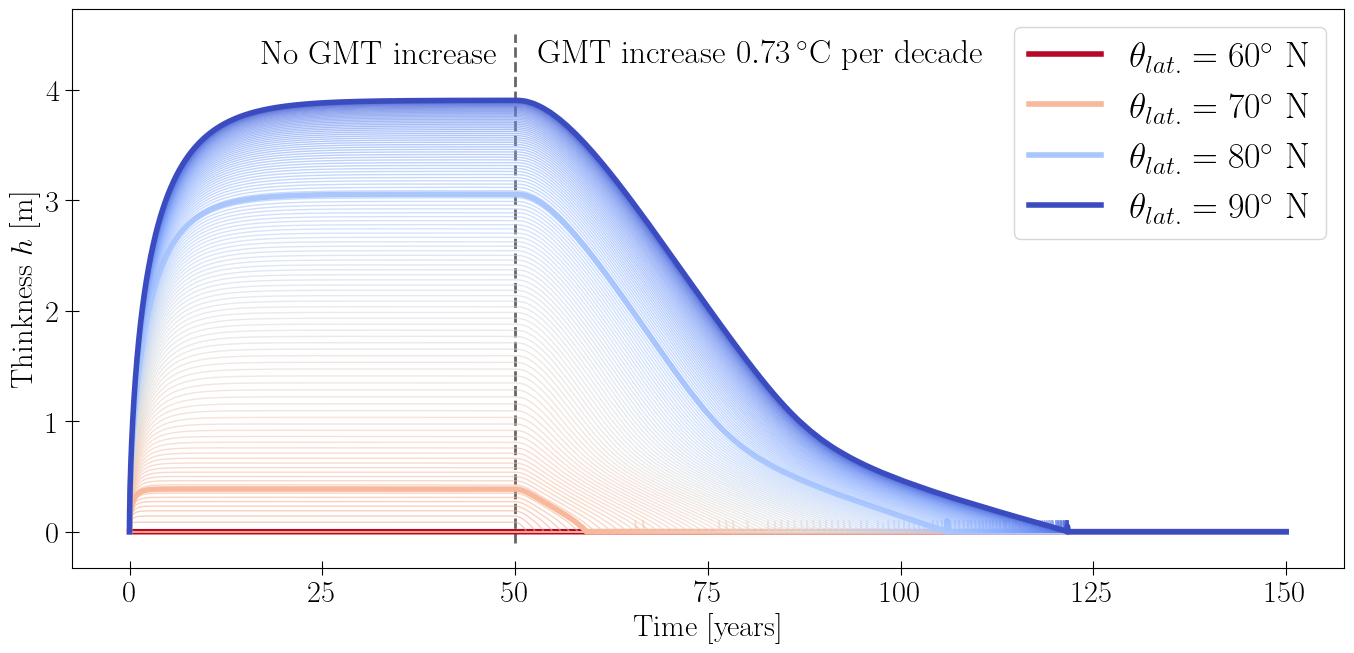

In [ ]:
plt.figure(figsize=(14, 7))

# Extracting indexes for the plot
ind = np.argmin(abs(60-lats))

lat_plot =lats[ind-1:]
legend_lat = lat

y0 = 4.5
plt.vlines(t_eq,-0.1,y0,color = 'k',ls = 'dashed',lw = 2,alpha =.6)
n = 0; m = 0

print('lat \t t no ice \t h max')
for l in lat_plot:
    color = cmap(1 - n / (len(lat_plot)-1)) 
    i = np.argmin(abs(lats - l))
    plt.plot(t_1,h_1[:,i],color = color,alpha= 0.6,lw =1)

    if abs(l - legend_lat[m]) < 0.1:
        plt.plot(t_1,h_1[:,i],color = color,label = f'$\\theta_{{lat.}} = {lats[i]:.0f}^\\circ$ N',lw = 4)
        print(f'{legend_lat[m]:.0f}\t {t_1[t_eq * 365+np.argmin(abs(h_1[t_eq * 365:,i] - 0.1))]:.0f} \t  {np.max(h_1[:,i]):.2f}') # Note that the time when h=0 are calculated when h = 0.1. this was done, since we didn't get it to match the curve for the area... 

        m += 1

    n += 1



plt.ylabel('Thinkness $h$ [m]')
plt.xlabel('Time [years]')

plt.legend(fontsize = 26)
plt.text(t_eq+3,y0-0.15,'GMT increase $0.73\\,^\\circ$C per decade',va = 'center_baseline',fontsize = 24)
plt.text(t_eq-33,y0-0.15,'No GMT increase',va = 'center_baseline',fontsize = 24)



plt.tick_params(direction='inout',length=10)
plt.xticks([0,25,50,75,100,125,150])
plt.tick_params(direction='inout',length=10)
plt.tight_layout()
#plt.savefig('figs/h_t_evolve_albedo.pdf',transparent=True)

Ice line 68.537
Ice sheet area 17.14 millions km^2
Linear fit given by: area = -0.259 * t + 17.14
Zero area by 66.75


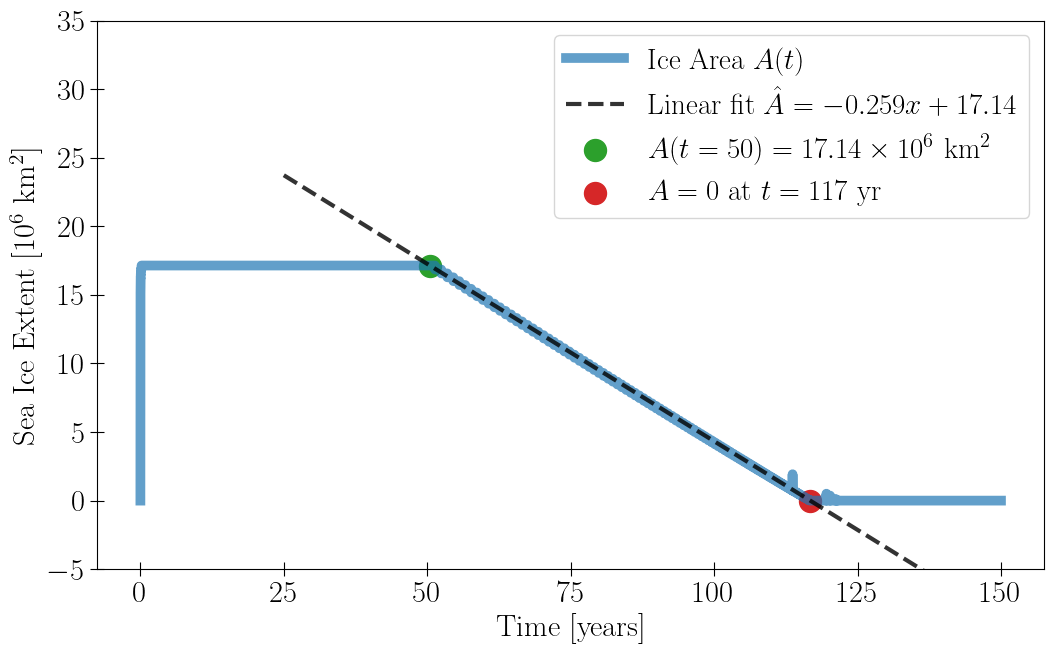

In [46]:


area = area_1 * 1e-6
t = t_1
h = h_1[:,ind:]

for N in range(len(h)):
    if h[t_eq*365,N] > 0.01:
        break
print(f'Ice line {lat_plot[N]:.3f}')
print(f'Ice sheet area {np.max(area):.2f} millions km^2')


i0 = np.argmin(abs(h[t_eq*365:,N])) + (t_eq-1)*365
i1 = np.argmin(abs(area[t_eq*365:])) + (t_eq)*365

plt.figure(figsize=(11, 7 ))

T_air = T_air_1[t_eq*365:,ind:]
#plt.hlines(mean_mar_old,np.min(t),np.max(t),ls = 'dashed',color = cmap(0.0),label=f'Mar. 1979-2000 $({mean_mar_old:.1f})$',lw =2)
#plt.hlines(mean_mar_new,np.min(t),np.max(t),ls = 'dotted',color = cmap(0.0),label=f'Mar. 2000-2023 $({mean_mar_new:.1f})$',lw =2)

plt.plot(t,area,color = 'tab:blue', label = 'Ice Area $A(t)$',lw = 7, alpha = .7)
#plt.hlines(mean_sep_old,np.min(t),np.max(t),ls = 'dashed',color = cmap(1.0),label=f'Sep. 1979-2000 $({mean_sep_old:.1f})$',lw =2)
#plt.hlines(mean_sep_new,np.min(t),np.max(t),ls = 'dotted',color = cmap(1.0),label=f'Sep. 2000-2023 $({mean_sep_new:.1f})$',lw =2)




plt.plot(t[25*365:],(area[i0] - area[i1])/(t[i0]-t[i1]) * (t[25*365:]-t[i0]) + area[i0],color ='k',alpha = 0.8,ls = 'dashed',label = f'Linear fit $\\hat{{A}} = {(area[i0] - area[i1])/(t[i0]-t[i1]):.3f}x + {area[i0]:.2f}$',lw = 3)


print(f'Linear fit given by: area = {(area[i0] - area[i1])/(t[i0]-t[i1]):.3f} * t + {area[i0]:.2f}')
print(f'Zero area by {t[i1] - t_eq:.2f}')
plt.scatter(t[i0],area[i0],s=250,label=f'$A(t=50)={area[i0]:.2f}\\times10^6$ km$^2$',c='tab:green')
plt.scatter(t[i1],area[i1],s=250,c='tab:red',label = f'$A=0$ at $t = {t[i1]:.0f}$ yr')

#plt.xlim([1,150])
plt.ylim([-5,35])
plt.xlabel('Time [years]')
plt.ylabel('Sea Ice Extent [$10^6$ km$^2$]')
plt.legend(ncols = 1,loc = 'upper right',fontsize = 21)
plt.xticks(np.arange(0,175,25))
plt.tick_params(direction='inout',length=10)

plt.tight_layout()
plt.savefig('figs/Ice_extent.pdf')
plt.savefig('figs/Ice_extent.png',transparent = True)

#print((area[t_eq * 365] - area[i0])/(t[t_eq * 365]-t[i0]))




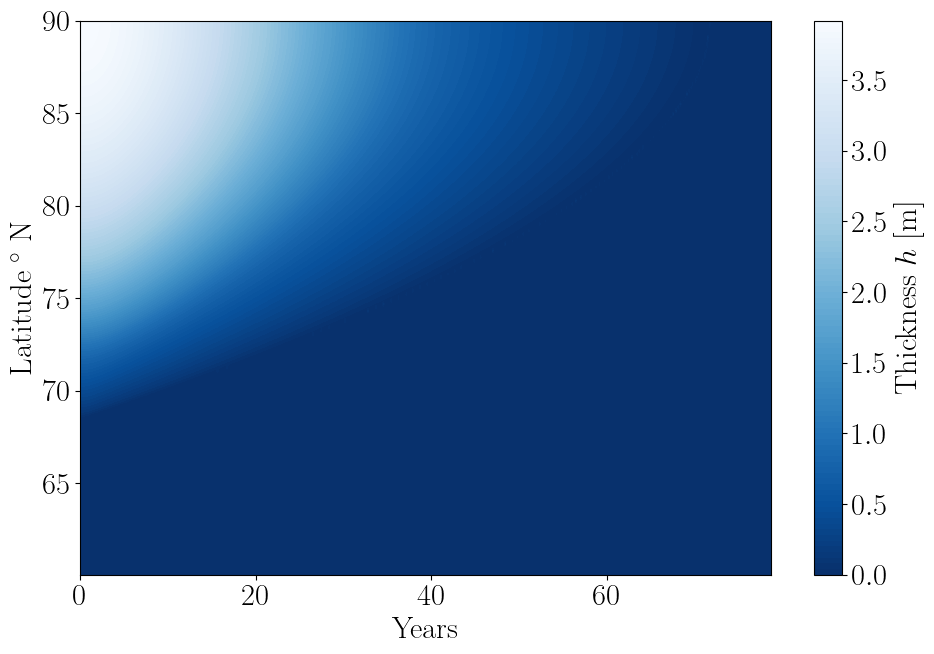

In [37]:
plt.figure(figsize=(10, 7))
freq = 12   

t = t_1[t_eq*365:-20*365] - t_eq
h = h_1[t_eq*365:,ind:]

t_avg = np.zeros(int(len(t) * freq / 365) - 1)
h_avg = np.zeros(((int(len(t) * freq / 365) - 1),int(len(h[0,:]))))

for i in range(len(t_avg)):
    t_avg[i] = t[i * int(365/freq)]
    h_avg[i,:] = (h[i * int(365/freq),:])   


X, Y = np.meshgrid(t_avg,lats[ind:])
X = X.T; Y=Y.T


plt.contourf(X,Y,h_avg,cmap = 'Blues_r',levels = 100)
plt.colorbar(label = 'Thickness $h$ [m]',ticks=[0,0.5,1,1.5,2,2.5,3,3.5])
plt.ylabel('Latitude $^\\circ$ N')
plt.xlabel('Years')
plt.tight_layout()
plt.savefig('figs/first_page.pdf')
